<a href="https://colab.research.google.com/github/akarsh0913/Practice-Deep-Learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Pre-processing & EDA**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
len(df[df['HeartDisease']==1]), len(df[df['HeartDisease']==0])

(508, 410)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

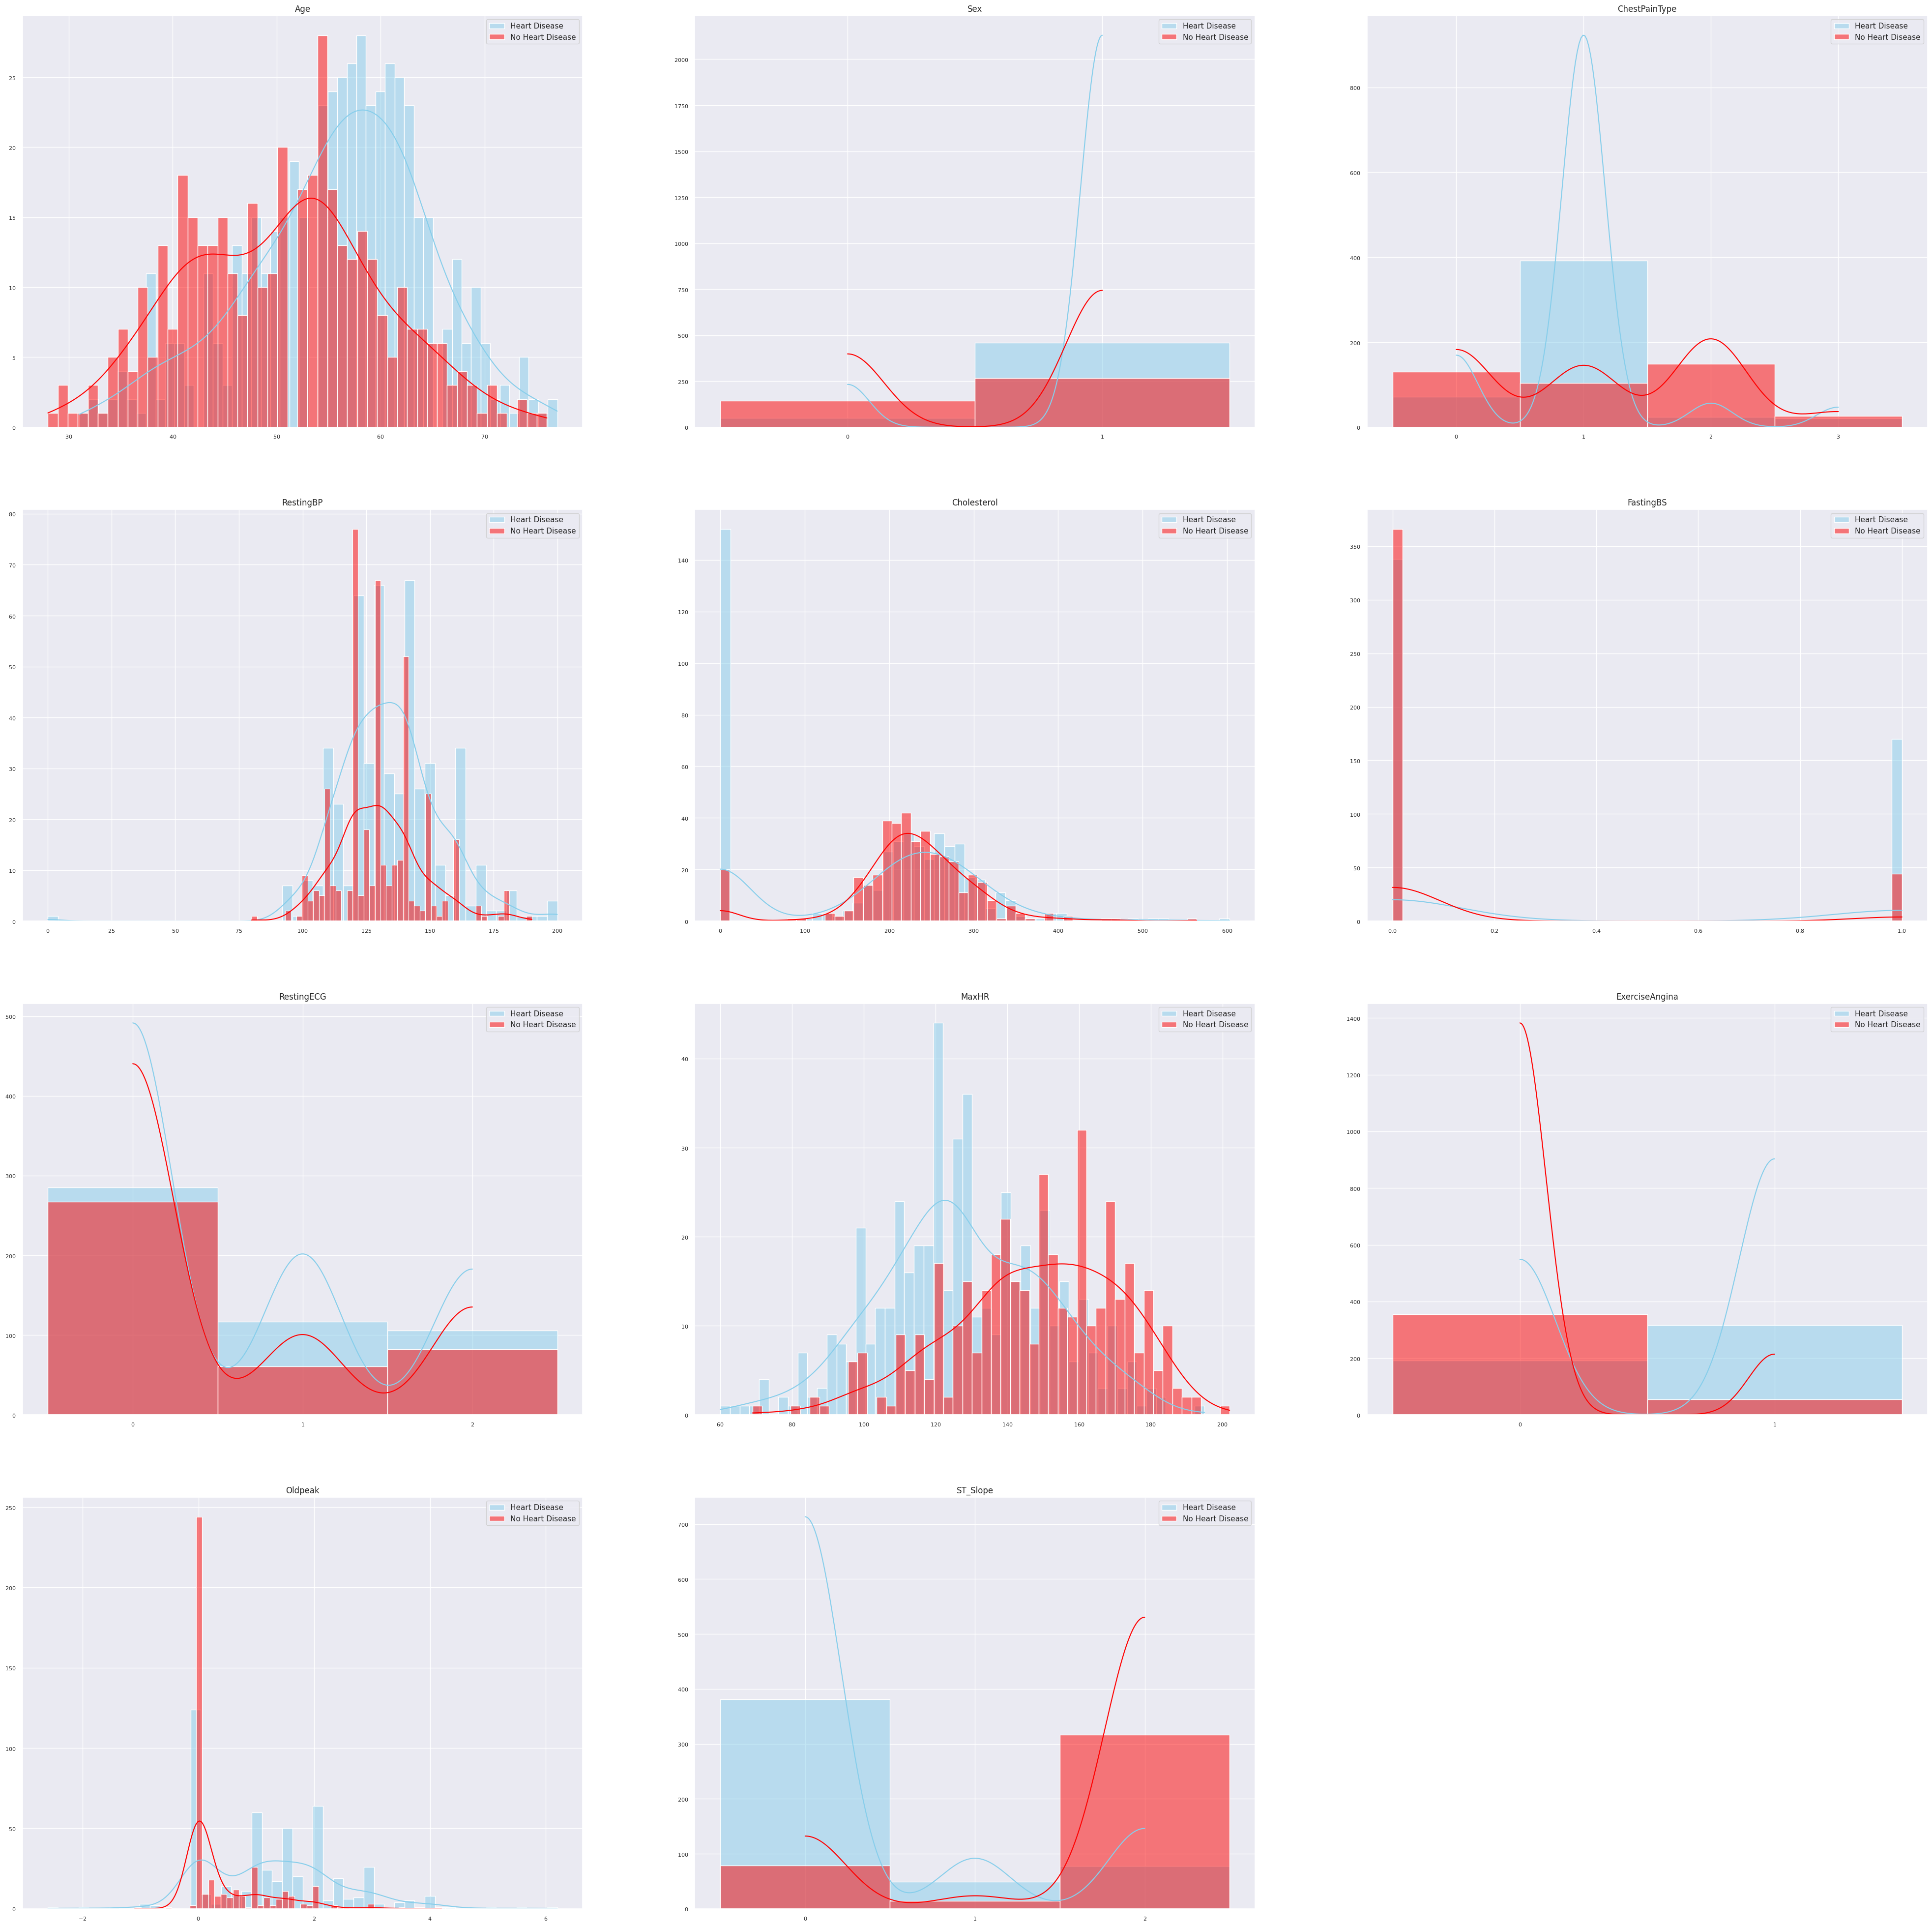

In [ ]:
sns.set(style="dark", rc={"axes.grid": True})

heart_disease_data = df[df['HeartDisease']==1]
no_heart_disease_data = df[df['HeartDisease']==0]

num_features = len(features)
num_cols = 3
num_rows = (num_features + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 50))

axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    sns.histplot(heart_disease_data[feature], bins=50, color="skyblue", ax=ax, label='Heart Disease', kde=True)
    sns.histplot(no_heart_disease_data[feature], bins=50, color="red", ax=ax, label='No Heart Disease', kde=True)
    ax.set_title(feature)
    ax.legend()
    ax.set_xlabel("\n")
    ax.set_ylabel("\n")
    ax.tick_params(axis='both', which='both', labelsize=8)
    ax.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))

for i in range(num_features, num_rows * num_cols):
    axs[i].axis('off')

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])

In [ ]:
temp_df = df.copy()
temp_df = pd.get_dummies(temp_df, columns=['ChestPainType'])
temp_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,0,0.0,Up,0,0,1,0,0
1,49,0,160,180,0,Normal,156,0,1.0,Flat,1,0,0,1,0
2,37,1,130,283,0,ST,98,0,0.0,Up,0,0,1,0,0
3,48,0,138,214,0,Normal,108,1,1.5,Flat,1,1,0,0,0
4,54,1,150,195,0,Normal,122,0,0.0,Up,0,0,0,1,0


In [ ]:
temp_df = pd.get_dummies(temp_df, columns=['RestingECG', 'ST_Slope'])
temp_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
temp_df.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
cols = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']

In [ ]:
temp_df = temp_df[cols]

In [ ]:
temp_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1,0
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0,1
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
new_fts = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']

In [ ]:
len(temp_df.columns)

19

In [ ]:
num_features = len(new_fts)
num_features

18

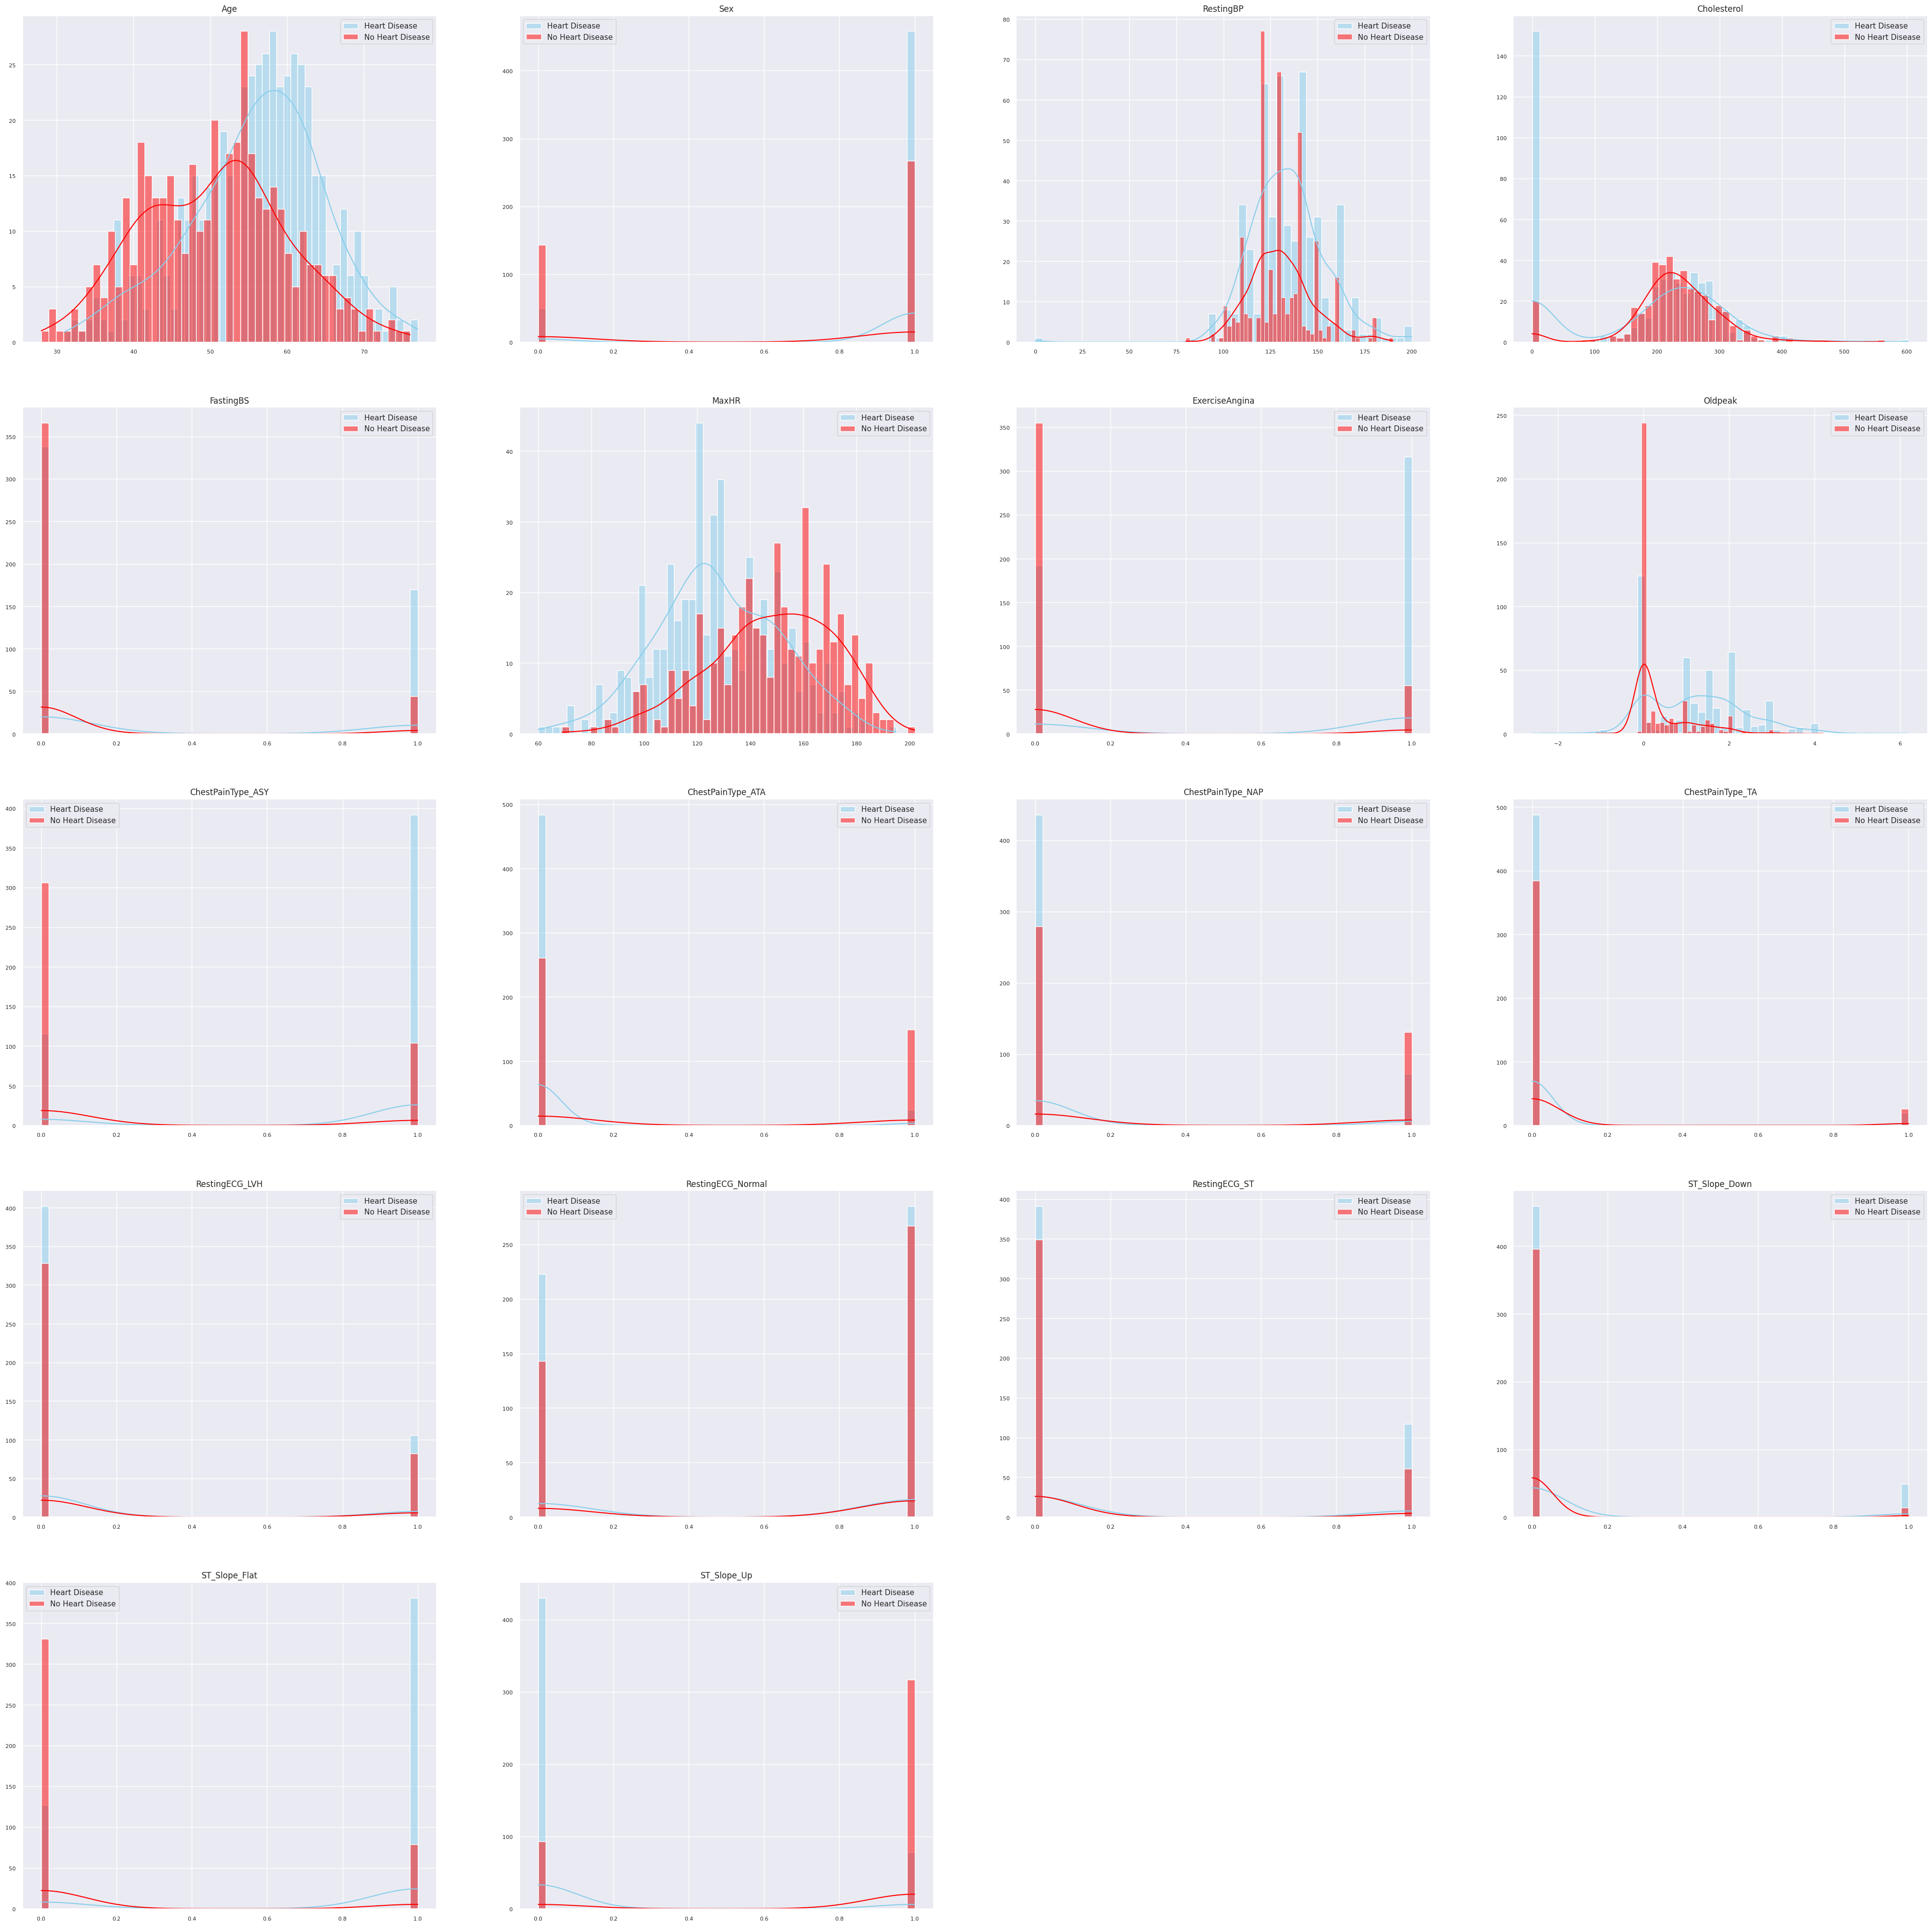

In [ ]:
sns.set(style="dark", rc={"axes.grid": True})

heart_disease_data = temp_df[temp_df['HeartDisease']==1]
no_heart_disease_data = temp_df[temp_df['HeartDisease']==0]

num_features = len(new_fts)
num_cols = 4
num_rows = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 50))

axs = axs.flatten()

for i, feature in enumerate(new_fts):
    ax = axs[i]
    sns.histplot(heart_disease_data[feature], bins=50, color="skyblue", ax=ax, label='Heart Disease', kde=True)
    sns.histplot(no_heart_disease_data[feature], bins=50, color="red", ax=ax, label='No Heart Disease', kde=True)
    ax.set_title(feature)
    ax.legend()
    ax.set_xlabel("\n")
    ax.set_ylabel("\n")
    ax.tick_params(axis='both', which='both', labelsize=8)
    ax.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))

for i in range(num_features, num_rows * num_cols):
    axs[i].axis('off')

plt.show()

In [ ]:
temp_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1,0
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0,1
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1,0


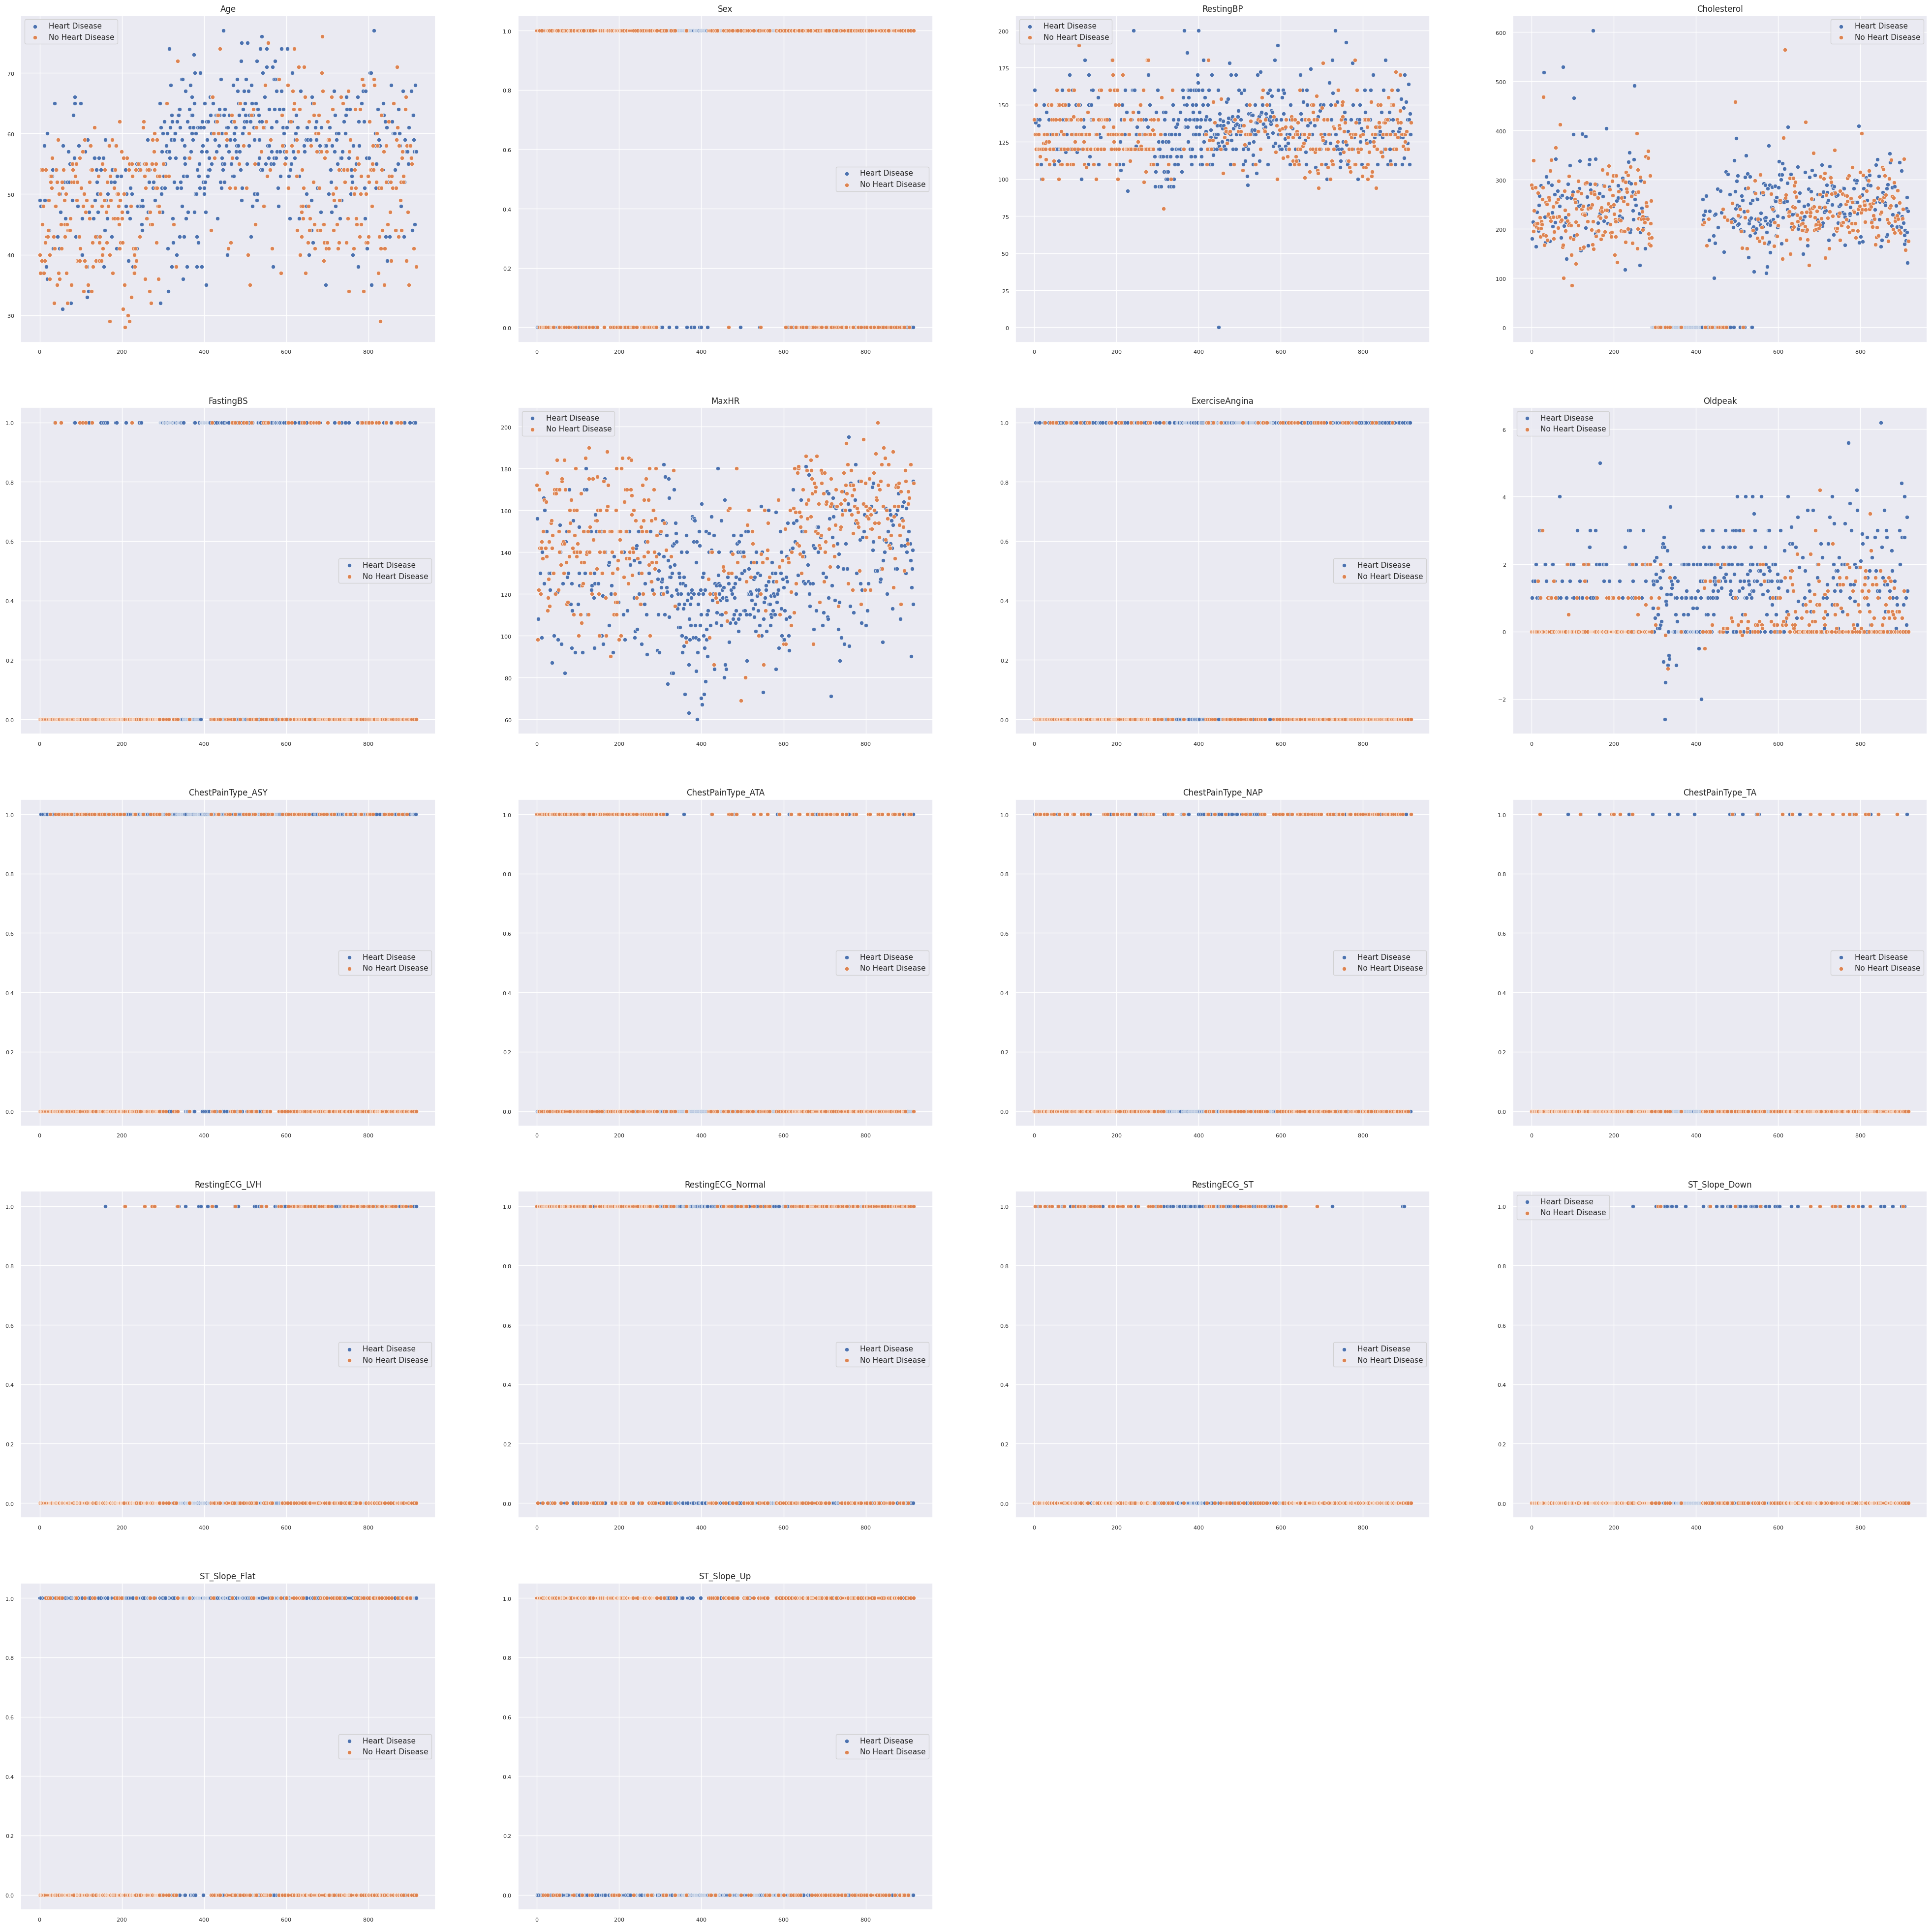

In [ ]:
sns.set(style="dark", rc={"axes.grid": True})

heart_disease_data = temp_df[temp_df['HeartDisease']==1]
no_heart_disease_data = temp_df[temp_df['HeartDisease']==0]

num_features = len(new_fts)
num_cols = 4
num_rows = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 50))

axs = axs.flatten()

for i, feature in enumerate(new_fts):
    ax = axs[i]
    sns.scatterplot(heart_disease_data[feature], ax=ax, label='Heart Disease')
    sns.scatterplot(no_heart_disease_data[feature], ax=ax, label='No Heart Disease')
    ax.set_title(feature)
    ax.legend()
    ax.set_xlabel("\n")
    ax.set_ylabel("\n")
    ax.tick_params(axis='both', which='both', labelsize=8)
    ax.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))

for i in range(num_features, num_rows * num_cols):
    axs[i].axis('off')

plt.show()

In [ ]:
correlation_matrix = temp_df.corr()

print("Correlation of each feature with target_label:")
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)
for feature, correlation_value in correlation_with_target.iteritems():
    print(f"{feature}: {correlation_value}")

Correlation of each feature with target_label:
HeartDisease: 1.0
ST_Slope_Flat: 0.5541335908840066
ChestPainType_ASY: 0.5167164574900888
ExerciseAngina: 0.4942819918242684
Oldpeak: 0.40395072206288607
Sex: 0.30544491596314044
Age: 0.2820385058189964
FastingBS: 0.26729118611029784
ST_Slope_Down: 0.12252667640649166
RestingBP: 0.10758898037140385
RestingECG_ST: 0.10252722218986644
RestingECG_LVH: 0.0106701959261144
ChestPainType_TA: -0.054790262026914095
RestingECG_Normal: -0.09157996051345949
ChestPainType_NAP: -0.21296362503940613
Cholesterol: -0.2327406389270114
MaxHR: -0.4004207694631906
ChestPainType_ATA: -0.4019240529146666
ST_Slope_Up: -0.6221642083959946


<ipython-input-38-254ceb2f51aa>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, correlation_value in correlation_with_target.iteritems():


<Axes: >

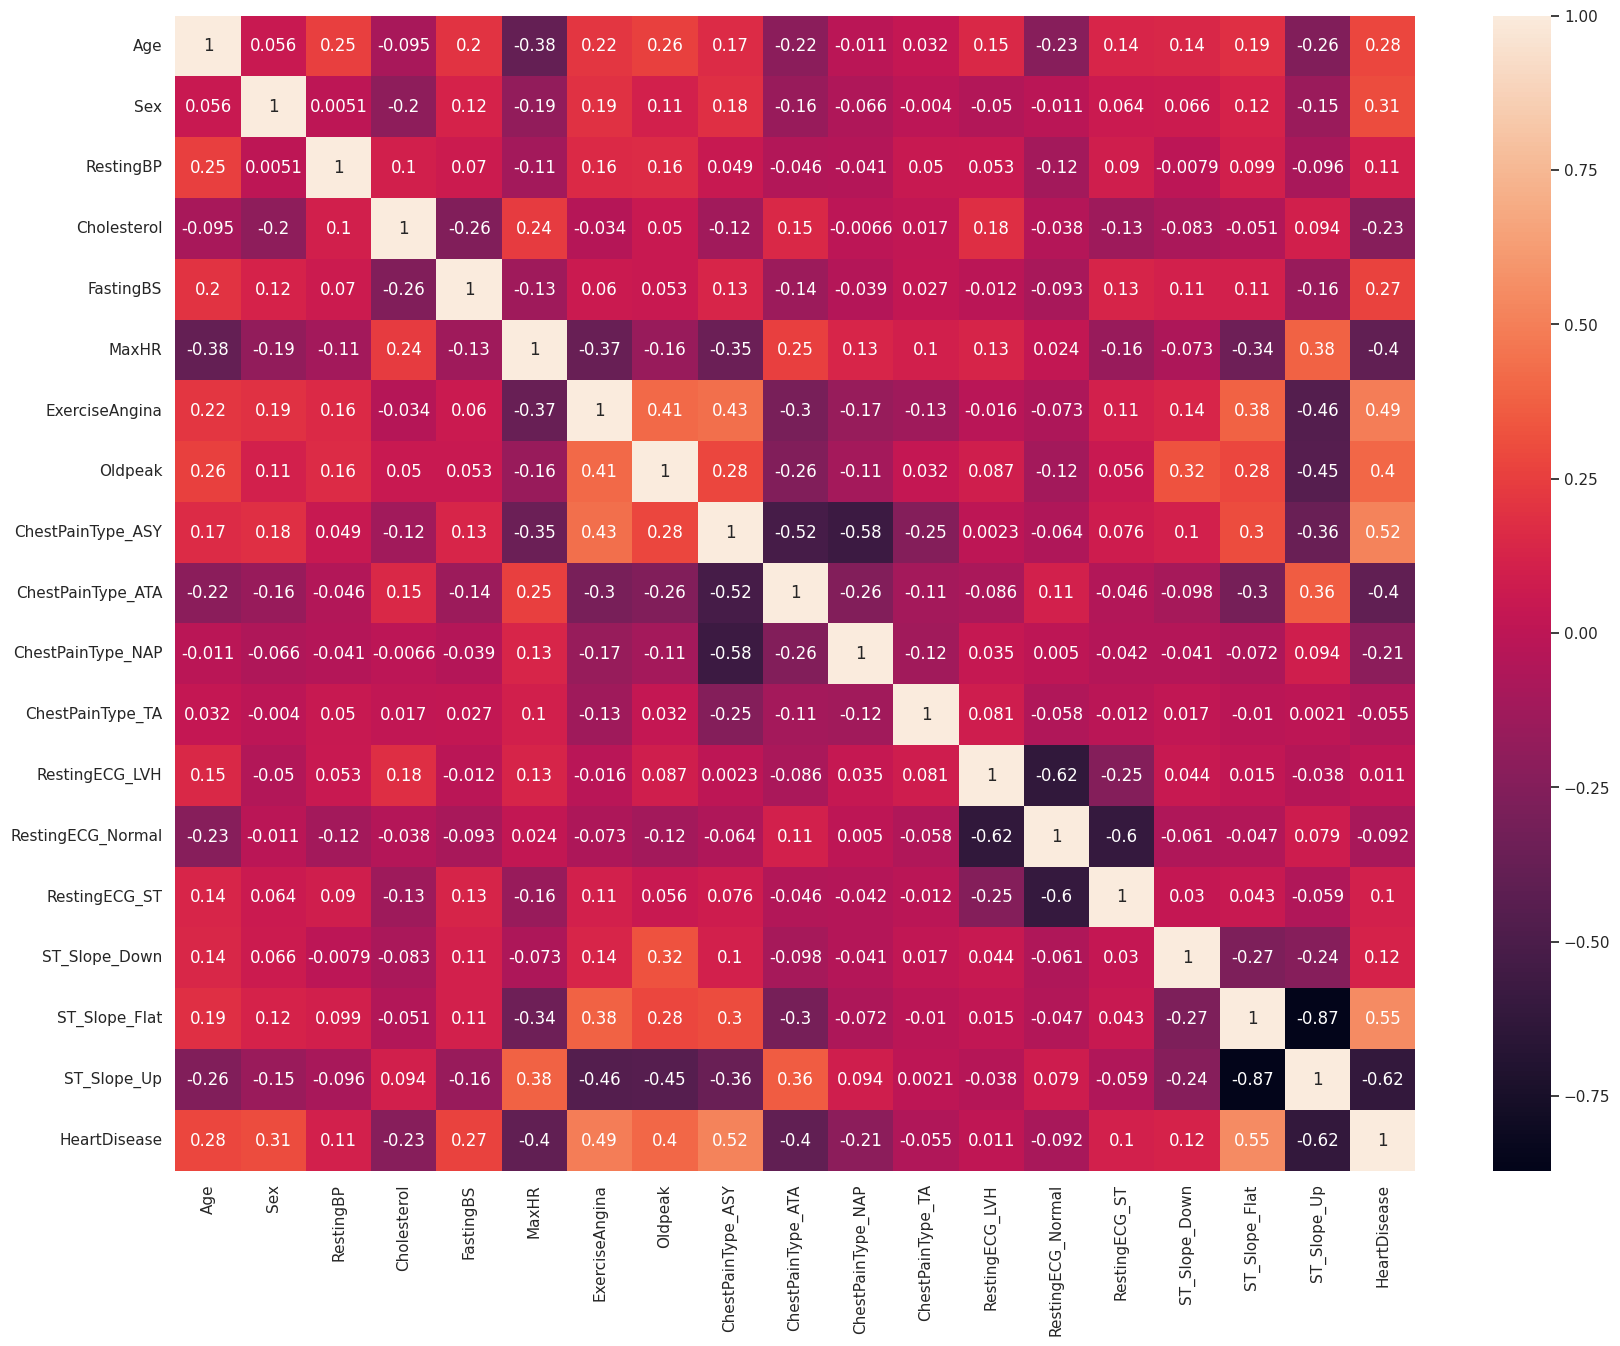

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, annot = True)

In [ ]:
temp_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1,0
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0,1
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
scaled_features = scaler.fit_transform(temp_df[columns_to_scale])

In [ ]:
new_X_scaled = pd.DataFrame(scaled_features, columns=columns_to_scale)

In [ ]:
temp_df = temp_df.drop(['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], axis=1)

In [ ]:
temp_df['Age'] = new_X_scaled['Age']
temp_df['RestingBP'] = new_X_scaled['RestingBP']
temp_df['Cholesterol'] = new_X_scaled['Cholesterol']
temp_df['MaxHR'] = new_X_scaled['MaxHR']

In [ ]:
temp_df = temp_df[cols]

In [ ]:
temp_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,0.428571,0,0.80,0.298507,0,0.676056,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.0,0,1,0,0,0,0,1,0,0,1,0
3,0.408163,0,0.69,0.354892,0,0.338028,1,1.5,1,0,0,0,0,1,0,0,1,0,1
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,0.55,0.437811,0,0.507042,0,1.2,0,0,0,1,0,1,0,0,1,0,1
914,0.816327,1,0.72,0.320066,1,0.570423,0,3.4,1,0,0,0,0,1,0,0,1,0,1
915,0.591837,1,0.65,0.217247,0,0.387324,1,1.2,1,0,0,0,0,1,0,0,1,0,1
916,0.591837,0,0.65,0.391376,0,0.802817,0,0.0,0,1,0,0,1,0,0,0,1,0,1


# **Train Test Split, Model Training & Evaluation**

### (i) Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### (ii) Train Test Split

In [ ]:
X = temp_df.drop('HeartDisease', axis=1)
y = temp_df['HeartDisease']

In [ ]:
X.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up'],
      dtype='object')

In [ ]:
X = X.values

In [ ]:
X

array([[0.24489796, 1.        , 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.        , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 1.        , 0.65      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.65      , ..., 0.        , 1.        ,
        0.        ],
       [0.59183673, 0.        , 0.65      , ..., 0.        , 1.        ,
        0.        ],
       [0.20408163, 1.        , 0.69      , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
y = y.values

In [ ]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### (iii) Model Training & Evaluation

#### *Logistic Regression Model*

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_predictions)
print("Logistic Regression Validation Accuracy:", lr_accuracy)
print(classification_report(y_val, lr_predictions))

Logistic Regression Validation Accuracy: 0.8623188405797102
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        57
           1       0.91      0.85      0.88        81

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.86      0.86       138



In [ ]:
lr_confusion_matrix = confusion_matrix(y_val, lr_predictions)
print("Confusion Matrix for Logistic Regression:")
print(lr_confusion_matrix)

Confusion Matrix for Logistic Regression:
[[50  7]
 [12 69]]


#### *Random Forest Model*

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_predictions)
print("Random Forest Validation Accuracy:", rf_accuracy)
print(classification_report(y_val, rf_predictions))

Random Forest Validation Accuracy: 0.8913043478260869
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        57
           1       0.93      0.88      0.90        81

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138



In [ ]:
rf_confusion_matrix = confusion_matrix(y_val, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(rf_confusion_matrix)

Confusion Matrix for Random Forest:
[[52  5]
 [10 71]]


#### *SVM Model*

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_predictions)
print("SVM Validation Accuracy:", svm_accuracy)
print(classification_report(y_val, svm_predictions))

SVM Validation Accuracy: 0.8623188405797102
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        57
           1       0.91      0.85      0.88        81

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.86      0.86       138



In [ ]:
svm_confusion_matrix = confusion_matrix(y_val, svm_predictions)
print("Confusion Matrix for SVM:")
print(svm_confusion_matrix)

Confusion Matrix for SVM:
[[50  7]
 [12 69]]


#### *Decision Tree Model*

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_val)
dt_accuracy = accuracy_score(y_val, dt_predictions)
print("Decision Tree Validation Accuracy:", dt_accuracy)
print(classification_report(y_val, dt_predictions))

Decision Tree Validation Accuracy: 0.7536231884057971
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        57
           1       0.82      0.74      0.78        81

    accuracy                           0.75       138
   macro avg       0.75      0.76      0.75       138
weighted avg       0.76      0.75      0.76       138



In [ ]:
dt_confusion_matrix = confusion_matrix(y_val, dt_predictions)
print("Confusion Matrix for Decision Tree:")
print(dt_confusion_matrix)

Confusion Matrix for Decision Tree:
[[44 13]
 [21 60]]


#### *Gaussian Naive Bayes Model*

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_val)
nb_accuracy = accuracy_score(y_val, nb_predictions)
print("Naive Bayes Validation Accuracy:", nb_accuracy)
print(classification_report(y_val, nb_predictions))

Naive Bayes Validation Accuracy: 0.8840579710144928
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        57
           1       0.91      0.89      0.90        81

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



In [ ]:
nb_confusion_matrix = confusion_matrix(y_val, nb_predictions)
print("Confusion Matrix for Naive Bayes:")
print(nb_confusion_matrix)

Confusion Matrix for Naive Bayes:
[[50  7]
 [ 9 72]]


#### *KNN Model*

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_predictions)
print("K-Nearest Neighbors Validation Accuracy:", knn_accuracy)
print(classification_report(y_val, knn_predictions))

K-Nearest Neighbors Validation Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        57
           1       0.88      0.81      0.85        81

    accuracy                           0.83       138
   macro avg       0.82      0.83      0.82       138
weighted avg       0.83      0.83      0.83       138



In [ ]:
knn_confusion_matrix = confusion_matrix(y_val, knn_predictions)
print("Confusion Matrix for K-Nearest Neighbors:")
print(knn_confusion_matrix)

Confusion Matrix for K-Nearest Neighbors:
[[48  9]
 [15 66]]


#### *Neural Networks*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import History

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1216      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = History()
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[history])

Epoch 1/50
21/21 [==============================] - 5s 26ms/step - loss: 0.6337 - accuracy: 0.6931 - val_loss: 0.5477 - val_accuracy: 0.8478
Epoch 2/50
21/21 [==============================] - 0s 12ms/step - loss: 0.5069 - accuracy: 0.8364 - val_loss: 0.4533 - val_accuracy: 0.8261
Epoch 3/50
21/21 [==============================] - 0s 11ms/step - loss: 0.4364 - accuracy: 0.8349 - val_loss: 0.4214 - val_accuracy: 0.8333
Epoch 4/50
21/21 [==============================] - 0s 12ms/step - loss: 0.3991 - accuracy: 0.8380 - val_loss: 0.3948 - val_accuracy: 0.8478
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.3734 - accuracy: 0.8520 - val_loss: 0.3653 - val_accuracy: 0.8623
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.3622 - accuracy: 0.8551 - val_loss: 0.3561 - val_accuracy: 0.8696
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 0.3573 - accuracy: 0.8676 - val_loss: 0.3518 - val_accuracy: 0.8623
Epoch 8/50
21

In [ ]:
probabilities = nn_model.predict(X_test)
threshold = 0.5
nn_predictions = (probabilities > threshold).astype(int)
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Accuracy:", nn_accuracy)
print(classification_report(y_test, nn_predictions))

5/5 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.8768115942028986
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        55
           1       0.92      0.87      0.89        83

    accuracy                           0.88       138
   macro avg       0.87      0.88      0.87       138
weighted avg       0.88      0.88      0.88       138



In [ ]:
nn_confusion_matrix = confusion_matrix(y_test, nn_predictions)
print("Confusion Matrix for Neural Network:")
print(nn_confusion_matrix)

Confusion Matrix for Neural Network:
[[49  6]
 [11 72]]


### (iv) Visualizations

#### *Validation & Testing Accuracies for Every Model*

In [ ]:
nn_val_predictions = (nn_model.predict(X_val) > threshold).astype(int)
nn_val_accuracy = accuracy_score(y_val, nn_val_predictions)

nn_test_predictions = (nn_model.predict(X_test) > threshold).astype(int)
nn_test_accuracy = accuracy_score(y_test, nn_test_predictions)

5/5 [==============================] - 0s 2ms/step


In [ ]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors', 'Neural Network']

# Calculate validation accuracies
val_accuracies = [lr_accuracy, rf_accuracy, svm_accuracy, dt_accuracy, nb_accuracy, knn_accuracy, nn_val_accuracy]

# Calculate testing accuracies
test_accuracies = []
for model in [lr, rf, svm, dt, nb, knn]:
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

test_accuracies.append(nn_test_accuracy)

# Create a DataFrame for models and their training, validation, and testing accuracies
accuracy_table = pd.DataFrame({
    'Model': models,
    'Validation Accuracy': val_accuracies,
    'Testing Accuracy': test_accuracies
})

In [ ]:
accuracy_table

,Model,Validation Accuracy,Testing Accuracy
0,Logistic Regression,0.862319,0.891304
1,Random Forest,0.891304,0.898551
2,SVM,0.862319,0.884058
3,Decision Tree,0.753623,0.717391
4,Naive Bayes,0.884058,0.884058
5,K-Nearest Neighbors,0.826087,0.847826
6,Neural Network,0.862319,0.876812


#### *Confusion Matrix Values for Every Model*

*   TP - True Positive
*   TN - True Negative
*   FP - False Positive
*   FN - False Negative


In [ ]:
confusion_matrices = [lr_confusion_matrix, rf_confusion_matrix, svm_confusion_matrix, dt_confusion_matrix, nb_confusion_matrix, knn_confusion_matrix, nn_confusion_matrix]

# Extract TP, TN, FP, FN values from confusion matrices
tp_values = [cm[1, 1] for cm in confusion_matrices]
tn_values = [cm[0, 0] for cm in confusion_matrices]
fp_values = [cm[0, 1] for cm in confusion_matrices]
fn_values = [cm[1, 0] for cm in confusion_matrices]

# Create a DataFrame for models and their TP, TN, FP, FN values
confusion_matrix_table = pd.DataFrame({
    'Model': models,
    'True Positive (TP)': tp_values,
    'True Negative (TN)': tn_values,
    'False Positive (FP)': fp_values,
    'False Negative (FN)': fn_values
})

In [ ]:
confusion_matrix_table

,Model,True Positive (TP),True Negative (TN),False Positive (FP),False Negative (FN)
0,Logistic Regression,69,50,7,12
1,Random Forest,71,52,5,10
2,SVM,69,50,7,12
3,Decision Tree,60,44,13,21
4,Naive Bayes,72,50,7,9
5,K-Nearest Neighbors,66,48,9,15
6,Neural Network,72,49,6,11


#### *Graphs for Machine Learning Models*
Includes Logistic Regression, Random Forest, SVM, Decision Tree, Naive Bayes and K-Nearest Neighbors

In [ ]:
g_models = [lr, rf, svm, dt, nb, knn]
g_model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors']
training_accuracies = {model_name: [] for model_name in g_models}
validation_accuracies = {model_name: [] for model_name in g_models}

In [ ]:
num_iterations = 50

# Train the models and track accuracy scores during training
for iteration in range(num_iterations):
    for model, model_name in zip([lr, rf, svm, dt, nb, knn], g_models):
        model.fit(X_train, y_train)  # Train the model
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)
        train_accuracy = accuracy_score(y_train, train_predictions)
        val_accuracy = accuracy_score(y_val, val_predictions)
        training_accuracies[model_name].append(train_accuracy)
        validation_accuracies[model_name].append(val_accuracy)

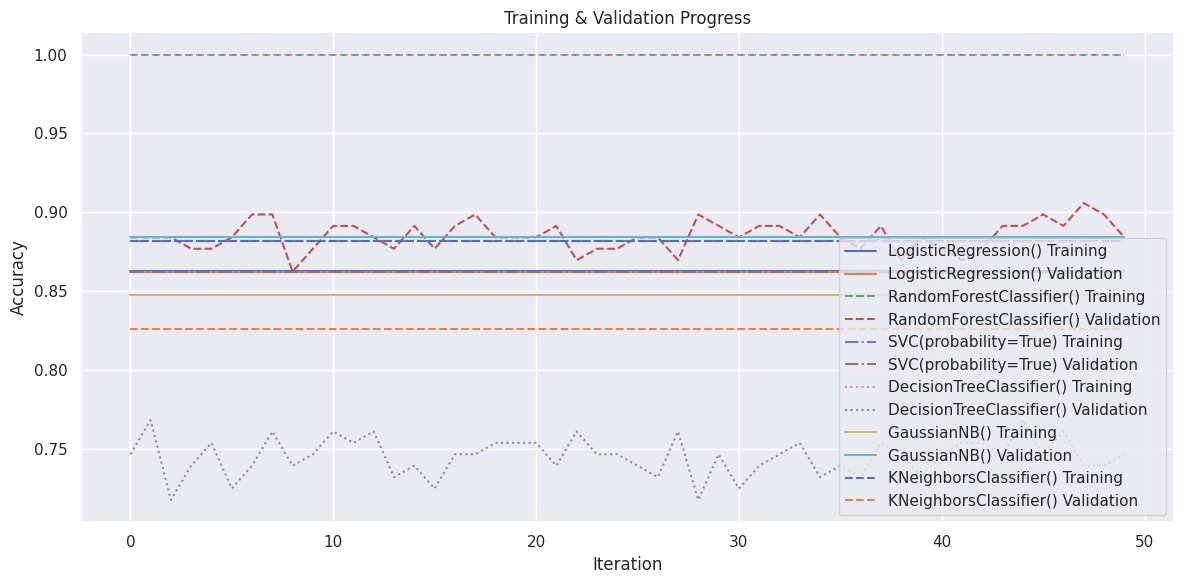

In [ ]:
plt.figure(figsize=(12, 6))
line_styles = ['-', '--', '-.', ':', '-', '--']  # Different line styles for each model
for model_name, line_style in zip(g_models, line_styles):
    plt.plot(np.arange(num_iterations), training_accuracies[model_name], label=f'{model_name} Training', linestyle=line_style)
    plt.plot(np.arange(num_iterations), validation_accuracies[model_name], label=f'{model_name} Validation', linestyle=line_style)

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training & Validation Progress')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))  # Place legend outside the plot, lower right
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### *Graph for Neural Networks Model*

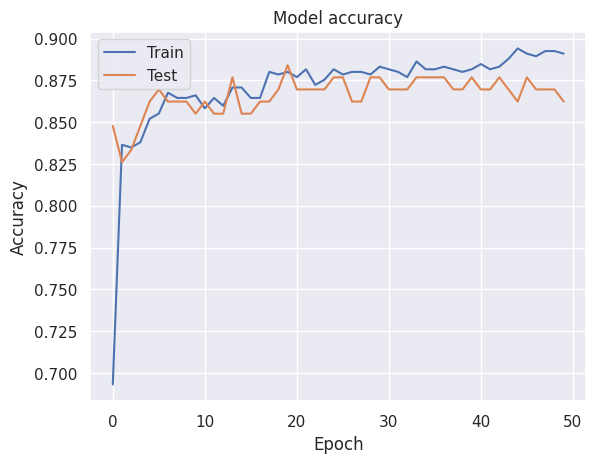

In [ ]:
plt.plot(history.history['accuracy']) # Use 'acc' for training accuracy
plt.plot(history.history['val_accuracy']) # Use 'val_acc' for validation accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

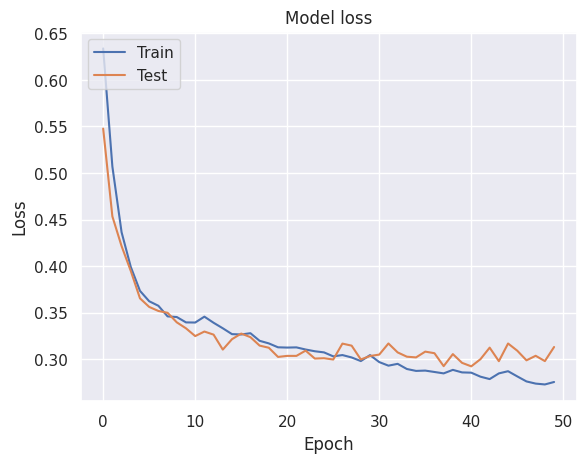

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### *ROC-AUC Curves*

5/5 [==============================] - 0s 3ms/step


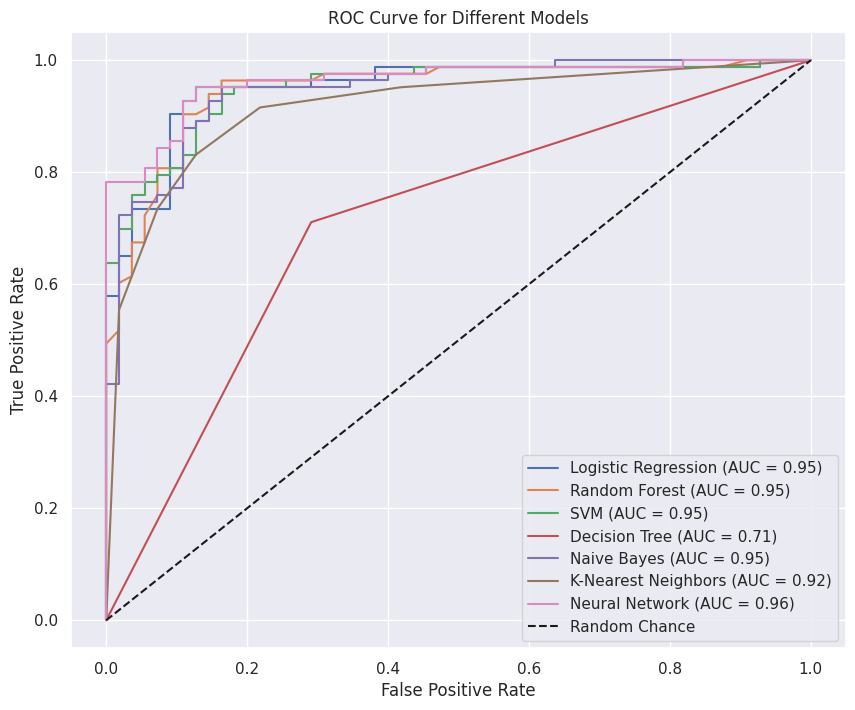

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def roc_auc_curve(names, classifiers, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, clf in zip(names, classifiers):
        # For neural network model, predict probabilities for positive class (class 1)
        if isinstance(clf, Sequential):  # Check if the model is a neural network
            pred_proba = clf.predict(X_test).ravel()  # Use ravel to flatten the 2D array
        else:
            pred_proba = clf.predict_proba(X_test)[:, 1]

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot random chance ROC curve (diagonal dashed line)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Different Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Usage example:
roc_auc_curve(roc_model_names, roc_models, X_test, y_test)
